6610402230 ศิริสุข ทานธรรม

# Setup Environment

In [1]:
import pandas as pd
import numpy as np
import random
import os

seed_value=1
random.seed(seed_value)
np.random.seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)

# Import data

In [2]:
df = pd.read_csv("CarPrice.csv")
df.dropna(axis='index', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ยี่ห้อ                501 non-null    object 
 1   ปีที่ออกขายครั้งแรก   501 non-null    object 
 2   ราคาขายมือสอง         501 non-null    object 
 3   กิโลเมตรที่ขับไปแล้ว  501 non-null    float64
 4   ประเภทเชื้อเพลิง      501 non-null    object 
 5   ประเภทผู้ขายรถ        501 non-null    object 
 6   ประเภทเกียร์          501 non-null    object 
 7   จำนวนเจ้าของรถในอดีต  501 non-null    float64
dtypes: float64(2), object(6)
memory usage: 35.2+ KB


In [3]:
df

,ยี่ห้อ,ปีที่ออกขายครั้งแรก,ราคาขายมือสอง,กิโลเมตรที่ขับไปแล้ว,ประเภทเชื้อเพลิง,ประเภทผู้ขายรถ,ประเภทเกียร์,จำนวนเจ้าของรถในอดีต
0,Suzuki,2007,60000,70000.0,เบนซิน,เจ้าของขายเอง,Manual,3.0
1,Suzuki,2007,135000,50000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0
2,Hyundai Verna 1.6 SX,2012,600000,100000.0,ดีเซล,เจ้าของขายเอง,Manual,1.0
3,Mitsubishi,2017,250000,46000.0,เบนซิน,เจ้าของขายเอง,Manual,1.0
4,Honda,2014,450000,141000.0,ดีเซล,เจ้าของขายเอง,Manual,2.0
...,...,...,...,...,...,...,...,...
496,Ford,2019,700000,12586.0,เบนซิน,เต๊นท์รถ,Manual,1.0
497,Fiat,2018,650000,38083.0,ดีเซล,เต๊นท์รถ,Manual,1.0
498,Ford,2012,400000,55328.0,ดีเซล,เต๊นท์รถ,Manual,2.0
499,Ford,2012,425000,81632.0,ดีเซล,เต๊นท์รถ,Manual,1.0


In [4]:
y = np.array(df.loc[:, (df.columns == 'ราคาขายมือสอง')].astype(int))

In [5]:
categorical_columns = ['ยี่ห้อ', 'ประเภทเชื้อเพลิง', 'ประเภทผู้ขายรถ', 'ประเภทเกียร์']
numerical_columns = ['ปีที่ออกขายครั้งแรก', 'กิโลเมตรที่ขับไปแล้ว', 'จำนวนเจ้าของรถในอดีต']

# Preprocessing data

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
enc = LabelEncoder()
transformed = enc.fit_transform(df[categorical_columns[0]])
transformed = transformed.reshape(-1,1)
transformed.shape

(501, 1)

In [8]:
encoders = {}
X = np.empty((df.shape[0],0))
for col in categorical_columns:
    enc = LabelEncoder()
    transformed = enc.fit_transform(df[[col]])
    X = np.hstack((X, transformed.reshape(-1,1)))
    encoders[col] = enc

print(X.shape)
for col in numerical_columns:
    X = np.hstack((X, np.array(df.loc[:, [col]])))
    
print(X.shape)
X

(501, 4)
(501, 7)


/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vecto

array([[113.0, 3.0, 0.0, ..., '2007', 70000.0, 3.0],
       [113.0, 3.0, 0.0, ..., '2007', 50000.0, 1.0],
       [46.0, 2.0, 0.0, ..., '2012', 100000.0, 1.0],
       ...,
       [4.0, 2.0, 1.0, ..., '2012', 55328.0, 2.0],
       [4.0, 2.0, 1.0, ..., '2012', 81632.0, 1.0],
       [4.0, 2.0, 1.0, ..., '2016', 155201.0, 1.0]], dtype=object)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X).astype(float)
print(X.shape)
X

(501, 7)


array([[ 0.80732271,  0.91477557, -0.48372528, ..., -1.41140393,
         0.03346169,  2.2625913 ],
       [ 0.80732271,  0.91477557, -0.48372528, ..., -1.41140393,
        -0.40420005, -0.70872781],
       [-0.61806133, -0.80816639, -0.48372528, ..., -0.23130819,
         0.68995429, -0.70872781],
       ...,
       [-1.51158565, -0.80816639,  2.0672891 , ..., -0.23130819,
        -0.28760696,  0.77693174],
       [-1.51158565, -0.80816639,  2.0672891 , ..., -0.23130819,
         0.28800575, -0.70872781],
       [-1.51158565, -0.80816639,  2.0672891 , ...,  0.71276841,
         1.89792256, -0.70872781]])

# Split data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value,shuffle=True)

In [11]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
X_train[0]

(400, 7) (400, 1) (101, 7) (101, 1)


array([ 0.10526788, -0.80816639, -0.48372528,  0.30640898, -0.46732734,
        0.03346169,  2.2625913 ])

In [12]:
import matplotlib.pyplot as plt 
from sklearn.svm import SVR 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,mean_absolute_error

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear','poly','rbf']
}

scorer = make_scorer(mean_absolute_error,greater_is_better=False)
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=2,cv=10,scoring=scorer)
grid.fit(X_train, y_train.ravel())

model = grid.best_estimator_
print(model.get_params())
model.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=

/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=1, kernel='poly')

0.5423694480723376
Mean Absolute Error: 167630.51738691895


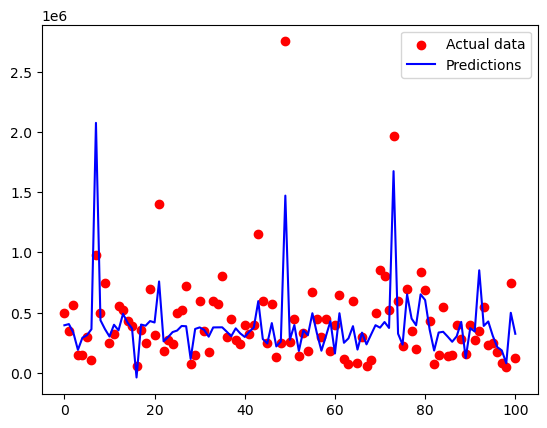

In [14]:
from sklearn.metrics import mean_absolute_error

y_predict = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predict)
print(model.score(X_test,y_test))
print(f"Mean Absolute Error: {mae}")

plt.scatter(range(len(X_test)), y_test, color='red', label='Actual data')
plt.plot(range(len(X_test)), y_predict, color='blue', label='Predictions')
plt.legend()
plt.show()


Mean Absolute Error: 197589.0778570436


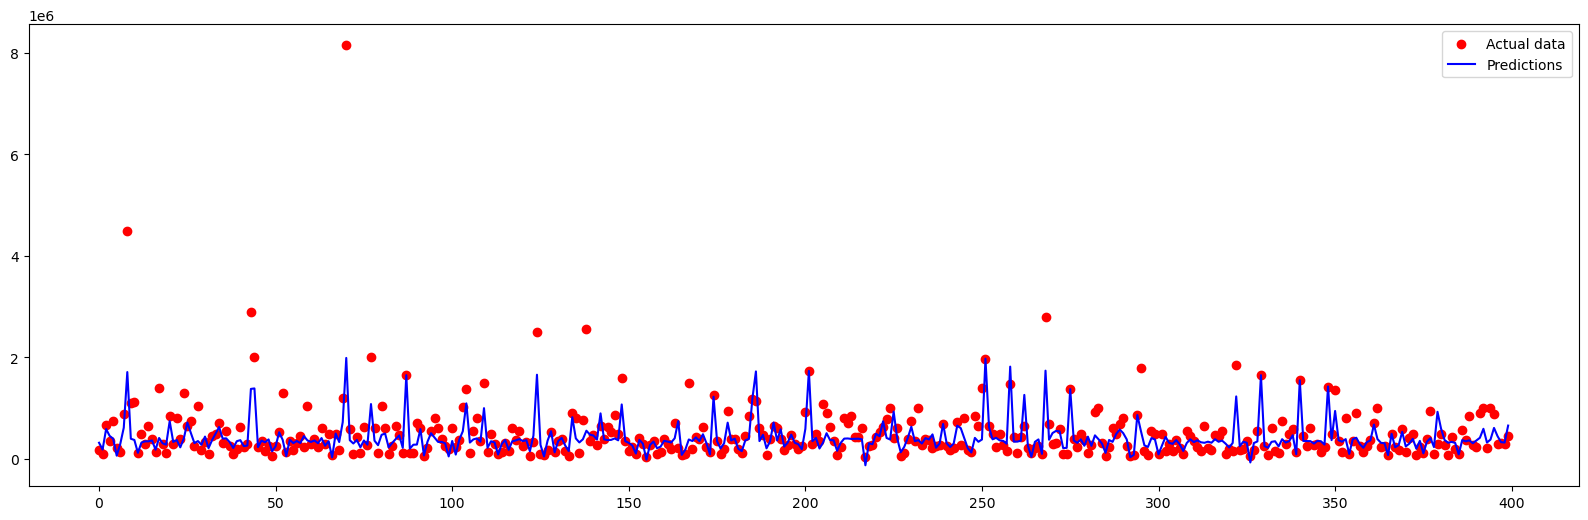

In [15]:
from sklearn.metrics import mean_absolute_error

y_predict = model.predict(X_train)
mae = mean_absolute_error(y_train, y_predict)
print(f"Mean Absolute Error: {mae}")

plt.figure(figsize=(20, 6))
plt.scatter(range(len(X_train)), y_train, color='red', label='Actual data')
plt.plot(range(len(X_train)), y_predict, color='blue', label='Predictions')
plt.legend()
plt.show()

In [21]:
C = 100
gamma = np.arange(0.001,1.001,0.001)
scores = []
for g in gamma:
    model = SVR(kernel='poly',gamma=g,C=C)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = mean_absolute_error(y_pred,y_test)
    scores.append(score)

    

/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was pass

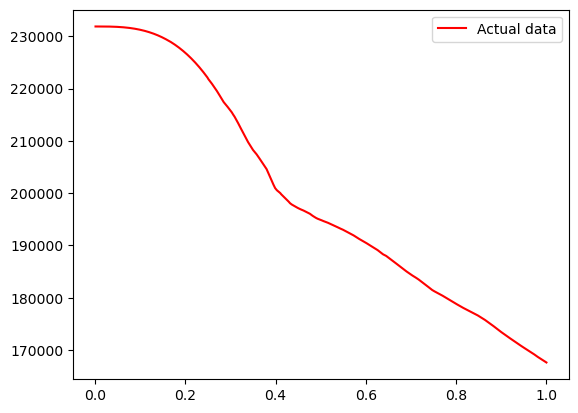

In [25]:
# plt.figure(figsize=(20, 6))
plt.plot(gamma, scores, color='red', label='Actual data')
plt.legend()
plt.show()

In [57]:
C = np.arange(100,1000,1)
gamma = 1
scores = []
for c in C:
    model = SVR(kernel='poly',gamma=gamma,C=c)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = mean_absolute_error(y_pred,y_test)
    scores.append(score)

/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was pass

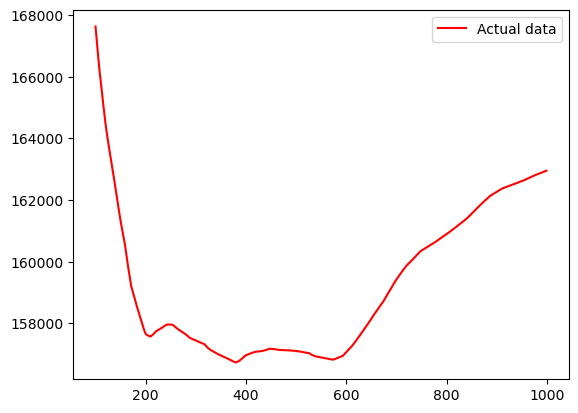

In [58]:
# plt.figure(figsize=(20, 6))
plt.plot(C, scores, color='red', label='Actual data')
plt.legend()
plt.show()

In [59]:
C = C[np.argmin(scores)]
gamma = 1

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 500
obj = -29575144844.462730, rho = -337326.441670
nSV = 397, nBSV = 345
R^2 Score:  0.611937369601081
Mean Absolute Error: 157265.81208715378


/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


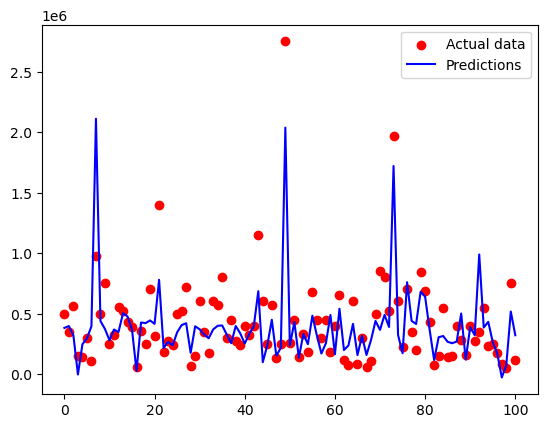

In [71]:


model = SVR(kernel='poly',gamma=gamma,C=C,verbose=True,max_iter=500)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predict)
print("R^2 Score: ",model.score(X_test,y_test))
print(f"Mean Absolute Error: {mae}")

    plt.scatter(range(len(X_test)), y_test, color='red', label='Actual data')
    plt.plot(range(len(X_test)), y_predict, color='blue', label='Predictions')
    plt.legend()
    plt.show()